In [1]:
import sys
sys.path.append("..")

import torch as tr
import torch.nn.functional as F
import numpy as np
import pickle as pk
from dataset.voc import VOCSegmentation

In [2]:
datadir = "../data/voc"
split_dir = "../data/voc/split"
data_root = "../data/voc/dataset"

In [3]:
val_size = 500

all_labels = np.genfromtxt(datadir+'/labels.txt', delimiter='\t', usecols=1, dtype='str')
seen_classes = np.load(datadir+'/split/seen_cls.npy')
seenval_classes = np.load(datadir+'/split/val_cls.npy')
train_classes = np.asarray(np.concatenate([seen_classes, seenval_classes]),dtype=int)
novel_classes = np.load(datadir+'/split/novel_cls.npy')
class_emb = np.concatenate([pk.load(open(datadir+'/word_vectors/fasttext.pkl', "rb")), pk.load(open(datadir+'/word_vectors/word2vec.pkl', "rb"))], axis = 1)
class_emb = F.normalize(tr.tensor(class_emb), p=2, dim=1)#.cuda()
train_images = np.load(datadir+'/split/train_list.npy')
val_images = train_images[-val_size:]
test_images = np.load(datadir+'/split/test_list.npy')
inverse_dict = pk.load(open(datadir+'/split/inverse_dict_train.pkl', 'rb'))

In [4]:
voc = VOCSegmentation(root="../data/")

In [5]:
# for i in range(len(voc)):
#     img, lbl = voc[i]
#     lbl = np.array(lbl)
#     cls = np.unique(lbl)
#     for c in cls:
#         if c != 255 and i not in inverse_dict[c]:
#             print(f"Error for class {c} in image {i}")

In [6]:
# VOCFSSDataset
from task import Task
from dataset import VOCFSSDataset
from dataset import transform
from torchvision.transforms import ToPILImage
import random

In [7]:
train_transform = transform.Compose([
    transform.RandomScale((0.75, 1.5)),
    transform.RandomCrop(512, pad_if_needed=True),
    transform.RandomHorizontalFlip(),
    transform.ToTensor()
#     transform.Normalize(mean=[0.485, 0.456, 0.406],
#                         std=[0.229, 0.224, 0.225]),
])

to_image = ToPILImage()

In [8]:
opts = lambda x:None
opts.step = 0
opts.task = '15-5'
opts.dataset = 'voc'
opts.nshot = 10
opts.ishot = 0
opts.input_mix = "novel"
opts.use_bkg = False
opts.crop_size=512

task = Task(opts)
print(task.order)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


In [9]:
train_dst = VOCFSSDataset(root="../data", task=task, train=True, transform=train_transform)
len(train_dst)

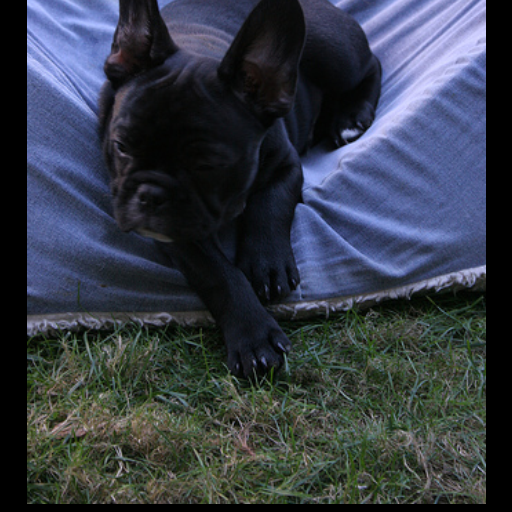

In [11]:
image, label = train_dst[random.randint(0, len(train_dst))]
to_image(image)

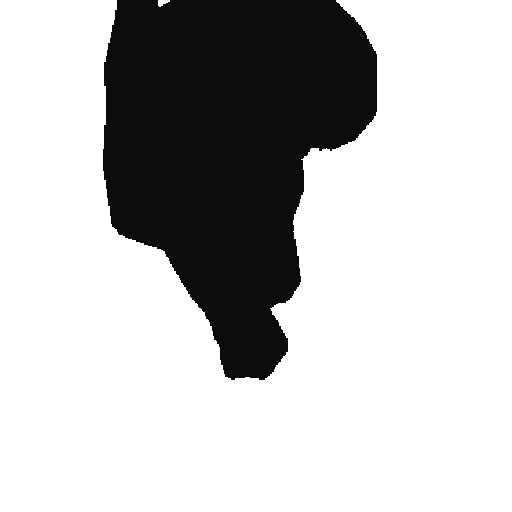

In [12]:
to_image(label)

In [30]:
opts = lambda x:None
opts.step = 1
opts.task = '15-5'
opts.dataset = 'voc'
opts.nshot = 2
opts.ishot = 0
opts.input_mix = "novel"
opts.use_bkg = True

task1 = Task(opts)
print(task1.order)
train_dst1 = VOCFSSDataset(root="../data", task=task1, train=True, transform=train_transform)
print(len(train_dst1))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
10


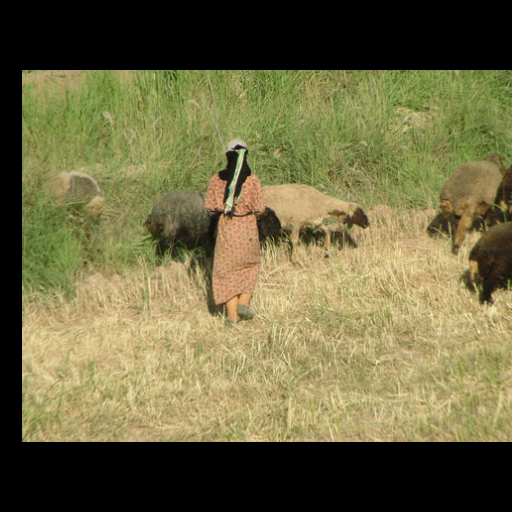

In [35]:
image, label = train_dst1[random.randint(0, len(train_dst1))]
to_image(image)

tensor([ 0, 15, 17], dtype=torch.uint8)


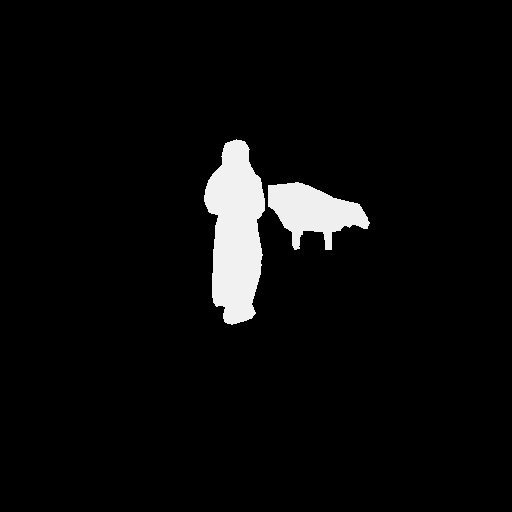

In [36]:
print(label.unique())
to_image(label*255)
